# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import phik

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Data Loading and Data Information Function

In [26]:
def load_all_data(verbose):
    """
    Load 4 dataframes and return them.
    """
    data_names = ['application_train.csv', 'application_test.csv', 'bureau.csv', 'bureau_balance.csv']
    for name in data_names:
        path = f'..//data//raw//{name}'
        if not os.path.exists(path):
            raise FileNotFoundError(f"Can't find {path}.")
        if name == 'application_train.csv':
            train = pd.read_csv(path)
        elif name == 'application_test.csv':
            test = pd.read_csv(path)
        elif name == 'bureau.csv':
            bureau = pd.read_csv(path)
        elif name == 'bureau_balance.csv':
            bureau_balance = pd.read_csv(path)
            
    if verbose:
        print('Done loading data.')
            
    return train, test, bureau, bureau_balance

def data_information(df, name):
    """
    Print information about the dataframe.
    """
    print(f"Data Information for {name}")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_columns = df.select_dtypes(include=[object]).columns.tolist()
    print(f"Number of numeric columns: {len(numeric_columns)}")
    print(f"Number of categorical columns: {len(categorical_columns)}")
    
    print(f"Number of missing values: {df.isnull().sum().sum()}")
    print(f"Number of unique values: {df.nunique().sum()}")
    print(f"Number of duplicated rows: {df.duplicated().sum()}")
    

In [24]:
train, test, bureau, bureau_balance = load_all_data(verbose=True)

Done loading data.


In [32]:
data_information(train, name='application_train')
print("-"*50); print("\n")
data_information(test, name='bureau')
print("-"*50); print("\n")
data_information(bureau, name='bureau_balance')

Data Information for application_train
Number of rows: 307511
Number of columns: 122
Number of numeric columns: 106
Number of categorical columns: 16
Number of missing values: 9152465
Number of unique values: 695662
Number of duplicated rows: 0
--------------------------------------------------


Data Information for bureau
Number of rows: 48744
Number of columns: 121
Number of numeric columns: 105
Number of categorical columns: 16
Number of missing values: 1404419
Number of unique values: 225067
Number of duplicated rows: 0
--------------------------------------------------


Data Information for bureau_balance
Number of rows: 1716428
Number of columns: 17
Number of numeric columns: 14
Number of categorical columns: 3
Number of missing values: 3939947
Number of unique values: 2671291
Number of duplicated rows: 0


# 2. Target Variable Analysis

In [41]:
def target_distribution(df, name):
    """
    Plot the target distribution.
    """
    # Calculate counts and percentages
    target_counts = df['TARGET'].value_counts().sort_index()
    target_percentages = 100 * target_counts / len(df)
    
    # Set the style and figure size
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Create the bar plot
    bars = ax.bar(
        x=['No Default (0)', 'Default (1)'], 
        height=target_counts,
        color=['#2ecc71', '#e74c3c'], 
        alpha=0.8,
        width=0.6
    )
    
    # Add labels and title with better formatting
    ax.set_title(f'Target Distribution for {name}', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Target', fontsize=14, fontweight='bold', labelpad=15)
    ax.set_ylabel('Count', fontsize=14, fontweight='bold', labelpad=15)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add count and percentage labels on top of bars
    for bar in bars:
        height = bar.get_height()
        idx = bars.index(bar)
        percentage = target_percentages[idx] if idx < len(target_percentages) else 0
        ax.text(
            bar.get_x() + bar.get_width()/2., 
            height + 0.01 * max(target_counts),
            f'{height:,}\n({percentage:.1f}%)',
            ha='center', va='bottom', fontsize=12, fontweight='bold'
        )
    
    # Add information about imbalance if present
    if len(target_counts) > 1 and max(target_counts) / min(target_counts) > 1.5:
        ratio = max(target_counts) / min(target_counts)
        ax.text(
            0.5, -0.2, 
            f'Imbalance Ratio: {ratio:.2f}:1',
            ha='center', transform=ax.transAxes, fontsize=12, 
            bbox=dict(facecolor='#f8f9fa', alpha=0.5, boxstyle='round,pad=0.5')
        )
    
    plt.tight_layout()
    plt.show()

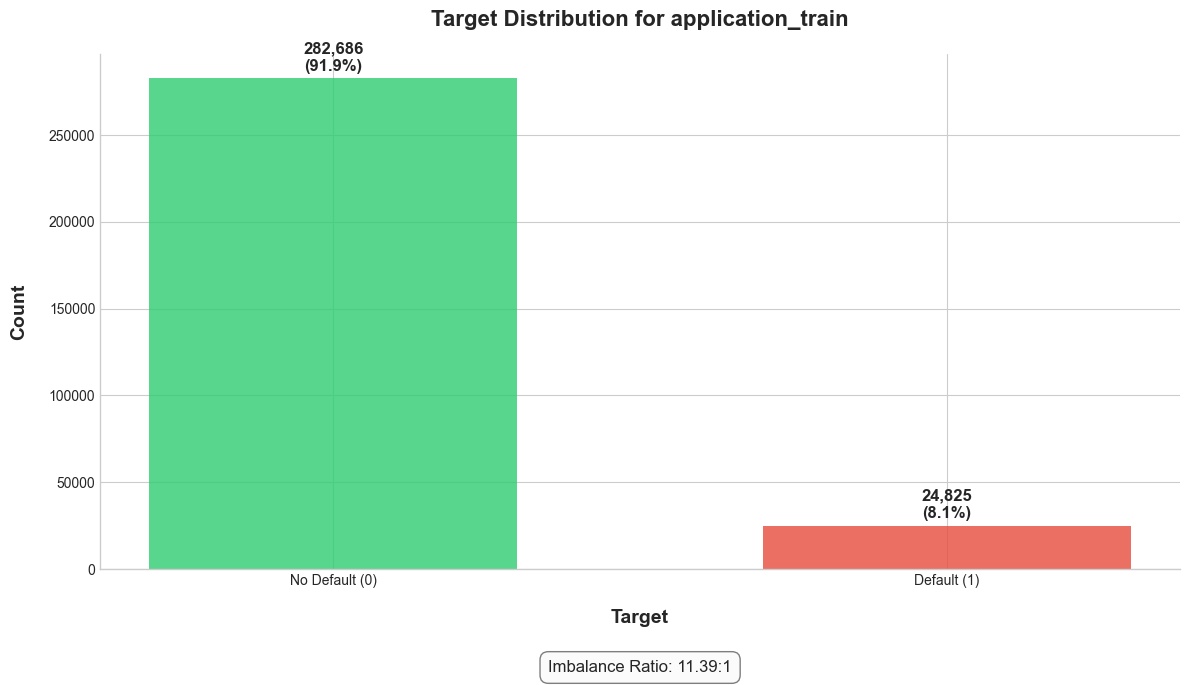

In [42]:
target_distribution(train, name='application_train')

# 3. Univariate Analysis

## 3.1 Numerical Columns